# Tutorial 2: Complete HER Catalyst Screening

## Hydrogen Evolution Reaction Analysis

This tutorial demonstrates a complete workflow for HER catalyst screening, including:

1. Data exploration and validation
2. ASCI calculation with different weight configurations
3. Pareto analysis to identify trade-off catalysts
4. Generation of figures
5. Results export and interpretation

---

## 1. Setup and Data Loading

In [16]:
# Import required libraries
import sys
sys.path.insert(0, '..')

from ascicat import ASCICalculator
from ascicat.visualizer import Visualizer
from ascicat.analyzer import Analyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

print("Libraries loaded successfully!")

Libraries loaded successfully!


### Load and Explore the HER Dataset

In [17]:
# Initialize calculator for HER
calc = ASCICalculator(reaction='HER', scoring_method='linear')

# Load data
calc.load_data('../data/HER_clean.csv')

# Basic dataset information
print("HER Dataset Overview")
print("="*50)
print(f"Total catalysts: {len(calc.data)}")
print(f"\nColumns: {calc.data.columns.tolist()}")
print(f"\nData types:")
print(calc.data.dtypes)


ASCICat Calculator Initialized

🔬 Reaction: HER
   Pathway: H adsorption
   Optimal Energy: ΔE_opt = -0.270 eV
   Description: Hydrogen Evolution Reaction (2H⁺ + 2e⁻ → H₂)

⚙️  Configuration:
   Activity Width: σ_a = 0.150 eV
   Scoring Method: LINEAR
   Default Weights: w_a=0.33, w_s=0.33, w_c=0.34 (EQUAL)


📂 Loading HER data from: ../data/HER_clean.csv

Loading HER Data
Pathway: H_adsorption

File: ../data/HER_clean.csv
✓ Loaded 361 entries

🔍 Validating data...
  ✓ Data types validated
  ✓ No missing critical values
  ✓ All values in reasonable ranges
  ✓ No duplicates found

✓ Final dataset: 361 entries (100.00% retained)

📊 Data Summary:
   Total catalysts: 361

   Activity Descriptor (ΔE):
      Range: [-0.399, -0.103] eV
      Mean:  -0.265 eV
      Optimal for HER: -0.270 eV

   Stability Descriptor (γ):
      Range: [0.282, 2.981] J/m²
      Mean:  1.354 J/m²

   Cost Descriptor:
      Range: [$2.67, $107,544] per kg
      Median: $113 per kg

   Unique primary elements: 12


In [3]:
# Statistical summary of key properties
key_cols = ['DFT_ads_E', 'surface_energy', 'Cost']
calc.data[key_cols].describe().round(3)

,DFT_ads_E,surface_energy,Cost
count,361.000,361.000,361.000
mean,-0.265,1.354,10669.904
std,0.084,0.657,18628.368
min,-0.399,0.282,2.667
25%,-0.340,0.860,19.541
50%,-0.273,1.012,112.937
75%,-0.202,1.917,15368.221
max,-0.103,2.981,107544.245


## 2. Data Visualization: Understanding the Property Space

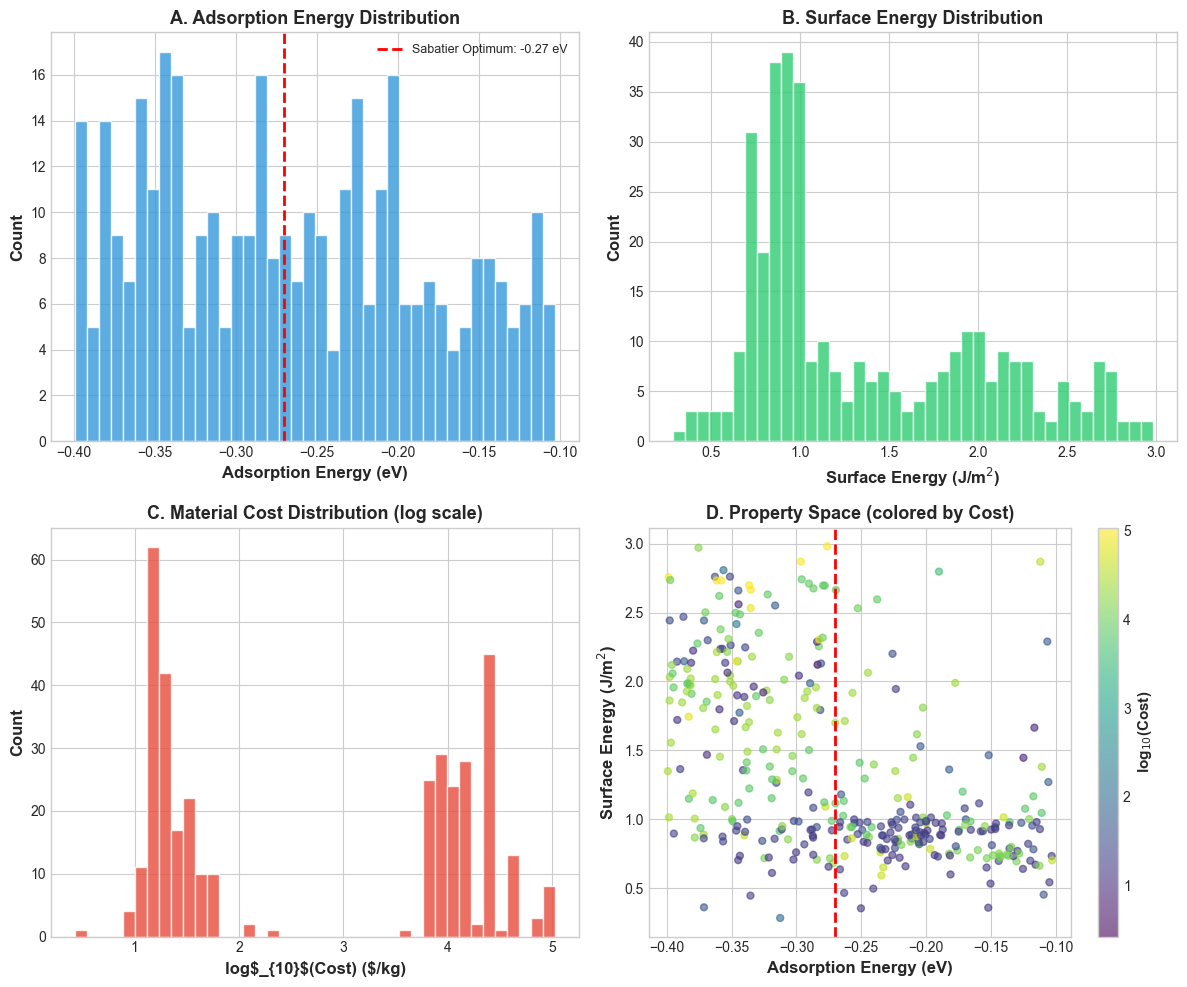

In [18]:
# Visualize the distribution of key properties
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Panel A: Adsorption energy distribution
axes[0, 0].hist(calc.data['DFT_ads_E'], bins=40, color='#3498db', edgecolor='white', alpha=0.8)
axes[0, 0].axvline(calc.config.optimal_energy, color='red', linestyle='--', linewidth=2,
                   label=f'Sabatier Optimum: {calc.config.optimal_energy} eV')
axes[0, 0].set_xlabel('Adsorption Energy (eV)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('A. Adsorption Energy Distribution', fontsize=13, fontweight='bold')
axes[0, 0].legend()

# Panel B: Surface energy distribution
axes[0, 1].hist(calc.data['surface_energy'], bins=40, color='#2ecc71', edgecolor='white', alpha=0.8)
axes[0, 1].set_xlabel('Surface Energy (J/m$^2$)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('B. Surface Energy Distribution', fontsize=13, fontweight='bold')

# Panel C: Cost distribution (log scale)
axes[1, 0].hist(np.log10(calc.data['Cost']), bins=40, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[1, 0].set_xlabel('log$_{10}$(Cost) ($/kg)', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('C. Material Cost Distribution (log scale)', fontsize=13, fontweight='bold')

# Panel D: Adsorption energy vs Surface energy
scatter = axes[1, 1].scatter(calc.data['DFT_ads_E'], calc.data['surface_energy'],
                             c=np.log10(calc.data['Cost']), cmap='viridis', alpha=0.6, s=25)
axes[1, 1].axvline(calc.config.optimal_energy, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Adsorption Energy (eV)', fontsize=12)
axes[1, 1].set_ylabel('Surface Energy (J/m$^2$)', fontsize=12)
axes[1, 1].set_title('D. Property Space (colored by Cost)', fontsize=13, fontweight='bold')
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('log$_{10}$(Cost)', fontsize=11)

plt.tight_layout()
plt.show()

## 3. ASCI Calculation

### 3.1 Equal Weights (Balanced Optimization)

In [19]:
# Calculate ASCI with equal weights
results_equal = calc.calculate_asci(w_a=0.33, w_s=0.33, w_c=0.34)

print("ASCI Calculation Complete (Equal Weights)")
print("="*50)
print(f"Weights: Activity={0.33}, Stability={0.33}, Cost={0.34}")
print(f"\nASCI Score Statistics:")
print(f"  Mean:  {results_equal['ASCI'].mean():.4f}")
print(f"  Std:   {results_equal['ASCI'].std():.4f}")
print(f"  Max:   {results_equal['ASCI'].max():.4f}")
print(f"  Min:   {results_equal['ASCI'].min():.4f}")


Calculating ASCI for HER

⚙️  Configuration:
   Weights: w_a=0.33, w_s=0.33, w_c=0.34
   Strategy: EQUAL weights (unbiased screening)
   Activity Scoring: LINEAR
   Catalysts: 361


Calculating ASCI: 100%|██████████| 4/4 


✓ ASCI calculation complete!
   Processed: 361 catalysts
   Best ASCI: 0.8989
   Mean ASCI: 0.5399
   Top catalyst: Fe2Sb4

ASCI Calculation Complete (Equal Weights)
Weights: Activity=0.33, Stability=0.33, Cost=0.34

ASCI Score Statistics:
  Mean:  0.5399
  Std:   0.1795
  Max:   0.8989
  Min:   0.0503


In [6]:
# Display top 15 catalysts
top_15 = calc.get_top_catalysts(n=15)
display_cols = ['symbol', 'DFT_ads_E', 'surface_energy', 'Cost', 
                'activity_score', 'stability_score', 'cost_score', 'ASCI', 'rank']
available_cols = [c for c in display_cols if c in top_15.columns]

print("\nTop 15 Catalysts (Equal Weights)")
print("="*80)
top_15[available_cols].round(3)


Top 15 Catalysts (Equal Weights)


,symbol,DFT_ads_E,surface_energy,Cost,activity_score,stability_score,cost_score,ASCI,rank
0,Fe2Sb4,-0.263,0.464,19.541,0.955,0.933,0.812,0.899,1
1,Cu3Sb,-0.250,0.353,15.092,0.868,0.974,0.837,0.892,2
2,Cu6Sb2,-0.275,0.655,15.092,0.965,0.862,0.837,0.888,3
3,Fe2Sb4,-0.266,0.635,19.541,0.976,0.869,0.812,0.885,4
4,Cu6Sn2,-0.273,0.919,15.437,0.982,0.764,0.834,0.860,5
5,Cu6Sb2,-0.287,0.741,15.092,0.887,0.830,0.837,0.851,6
6,Fe2Sb4,-0.267,0.944,19.541,0.979,0.755,0.812,0.848,7
7,Fe2Sb4,-0.241,0.496,19.541,0.805,0.921,0.812,0.846,8
8,Fe2Sn4,-0.261,0.851,20.461,0.938,0.789,0.808,0.845,9
9,Fe2Sb4,-0.266,0.978,19.541,0.976,0.742,0.812,0.843,10


### 3.2 Activity-Focused Weights

In [20]:
# Create a new calculator for activity-focused analysis
calc_activity = ASCICalculator(reaction='HER', scoring_method='linear')
calc_activity.load_data('../data/HER_clean.csv')

# Calculate with activity emphasis
results_activity = calc_activity.calculate_asci(w_a=0.60, w_s=0.20, w_c=0.20)

print("Activity-Focused Analysis")
print("="*50)
print(f"Weights: Activity={0.60}, Stability={0.20}, Cost={0.20}")

top_10_activity = calc_activity.get_top_catalysts(n=10)
top_10_activity[available_cols].round(3)


ASCICat Calculator Initialized

🔬 Reaction: HER
   Pathway: H adsorption
   Optimal Energy: ΔE_opt = -0.270 eV
   Description: Hydrogen Evolution Reaction (2H⁺ + 2e⁻ → H₂)

⚙️  Configuration:
   Activity Width: σ_a = 0.150 eV
   Scoring Method: LINEAR
   Default Weights: w_a=0.33, w_s=0.33, w_c=0.34 (EQUAL)


📂 Loading HER data from: ../data/HER_clean.csv

Loading HER Data
Pathway: H_adsorption

File: ../data/HER_clean.csv
✓ Loaded 361 entries

🔍 Validating data...
  ✓ Data types validated
  ✓ No missing critical values
  ✓ All values in reasonable ranges
  ✓ No duplicates found

✓ Final dataset: 361 entries (100.00% retained)

📊 Data Summary:
   Total catalysts: 361

   Activity Descriptor (ΔE):
      Range: [-0.399, -0.103] eV
      Mean:  -0.265 eV
      Optimal for HER: -0.270 eV

   Stability Descriptor (γ):
      Range: [0.282, 2.981] J/m²
      Mean:  1.354 J/m²

   Cost Descriptor:
      Range: [$2.67, $107,544] per kg
      Median: $113 per kg

   Unique primary elements: 12


Calculating ASCI: 100%|██████████| 4/4 


✓ ASCI calculation complete!
   Processed: 361 catalysts
   Best ASCI: 0.9219
   Mean ASCI: 0.5330
   Top catalyst: Fe2Sb4

Activity-Focused Analysis
Weights: Activity=0.6, Stability=0.2, Cost=0.2


,symbol,DFT_ads_E,surface_energy,Cost,activity_score,stability_score,cost_score,ASCI,rank
0,Fe2Sb4,-0.266,0.635,19.541,0.976,0.869,0.812,0.922,1
1,Fe2Sb4,-0.263,0.464,19.541,0.955,0.933,0.812,0.922,2
2,Cu6Sb2,-0.275,0.655,15.092,0.965,0.862,0.837,0.919,3
3,Cu6Sn2,-0.273,0.919,15.437,0.982,0.764,0.834,0.909,4
4,Fe2Sb4,-0.267,0.944,19.541,0.979,0.755,0.812,0.901,5
5,Fe2Sb4,-0.266,0.978,19.541,0.976,0.742,0.812,0.896,6
6,Cu3Sb,-0.250,0.353,15.092,0.868,0.974,0.837,0.883,7
7,Fe2Sn4,-0.261,0.851,20.461,0.938,0.789,0.808,0.882,8
8,Cu6Sb2,-0.287,0.741,15.092,0.887,0.830,0.837,0.865,9
9,Sb14Mo6,-0.266,1.179,39.065,0.970,0.668,0.747,0.865,10


### 3.3 Cost-Focused Weights

In [21]:
# Create a new calculator for cost-focused analysis
calc_cost = ASCICalculator(reaction='HER', scoring_method='linear')
calc_cost.load_data('../data/HER_clean.csv')

# Calculate with cost emphasis
results_cost = calc_cost.calculate_asci(w_a=0.20, w_s=0.20, w_c=0.60)

print("Cost-Focused Analysis")
print("="*50)
print(f"Weights: Activity={0.20}, Stability={0.20}, Cost={0.60}")

top_10_cost = calc_cost.get_top_catalysts(n=10)
top_10_cost[available_cols].round(3)


ASCICat Calculator Initialized

🔬 Reaction: HER
   Pathway: H adsorption
   Optimal Energy: ΔE_opt = -0.270 eV
   Description: Hydrogen Evolution Reaction (2H⁺ + 2e⁻ → H₂)

⚙️  Configuration:
   Activity Width: σ_a = 0.150 eV
   Scoring Method: LINEAR
   Default Weights: w_a=0.33, w_s=0.33, w_c=0.34 (EQUAL)


📂 Loading HER data from: ../data/HER_clean.csv

Loading HER Data
Pathway: H_adsorption

File: ../data/HER_clean.csv
✓ Loaded 361 entries

🔍 Validating data...
  ✓ Data types validated
  ✓ No missing critical values
  ✓ All values in reasonable ranges
  ✓ No duplicates found

✓ Final dataset: 361 entries (100.00% retained)

📊 Data Summary:
   Total catalysts: 361

   Activity Descriptor (ΔE):
      Range: [-0.399, -0.103] eV
      Mean:  -0.265 eV
      Optimal for HER: -0.270 eV

   Stability Descriptor (γ):
      Range: [0.282, 2.981] J/m²
      Mean:  1.354 J/m²

   Cost Descriptor:
      Range: [$2.67, $107,544] per kg
      Median: $113 per kg

   Unique primary elements: 12


Calculating ASCI: 100%|██████████| 4/4 


✓ ASCI calculation complete!
   Processed: 361 catalysts
   Best ASCI: 0.8704
   Mean ASCI: 0.5227
   Top catalyst: Cu3Sb

Cost-Focused Analysis
Weights: Activity=0.2, Stability=0.2, Cost=0.6


,symbol,DFT_ads_E,surface_energy,Cost,activity_score,stability_score,cost_score,ASCI,rank
0,Cu3Sb,-0.250,0.353,15.092,0.868,0.974,0.837,0.870,1
1,Cu6Sb2,-0.275,0.655,15.092,0.965,0.862,0.837,0.867,2
2,Fe2Sb4,-0.263,0.464,19.541,0.955,0.933,0.812,0.865,3
3,Fe2Sb4,-0.266,0.635,19.541,0.976,0.869,0.812,0.856,4
4,Cu6Sn2,-0.273,0.919,15.437,0.982,0.764,0.834,0.850,5
5,Fe3Cu,-0.284,2.121,2.667,0.909,0.319,1.000,0.845,6
6,Cu6Sb2,-0.287,0.741,15.092,0.887,0.830,0.837,0.845,7
7,Cu6Sn2,-0.287,0.866,15.437,0.886,0.784,0.834,0.835,8
8,Fe2Sb4,-0.267,0.944,19.541,0.979,0.755,0.812,0.834,9
9,Cu6Sn2,-0.287,0.880,15.437,0.884,0.779,0.834,0.833,10


## 4. Pareto Analysis

Identify catalysts that represent optimal trade-offs (Pareto-optimal solutions).

In [22]:
# Create Analyzer instance for Pareto analysis
analyzer = Analyzer(results_equal, calc.config)

# Get Pareto-optimal catalysts
pareto_catalysts = analyzer.get_pareto_optimal()

print(f"Pareto-Optimal Catalysts: {len(pareto_catalysts)} found")
print("="*50)
print("\nThese catalysts represent non-dominated solutions in the")
print("activity-stability-cost space.\n")

# Show Pareto catalysts with their ASCI rankings
pareto_display = pareto_catalysts.nsmallest(20, 'rank')
pareto_display[available_cols].round(3)

Pareto-Optimal Catalysts: 22 found

These catalysts represent non-dominated solutions in the
activity-stability-cost space.



,symbol,DFT_ads_E,surface_energy,Cost,activity_score,stability_score,cost_score,ASCI,rank
0,Fe2Sb4,-0.263,0.464,19.541,0.955,0.933,0.812,0.899,1
1,Cu3Sb,-0.250,0.353,15.092,0.868,0.974,0.837,0.892,2
2,Cu6Sb2,-0.275,0.655,15.092,0.965,0.862,0.837,0.888,3
3,Fe2Sb4,-0.266,0.635,19.541,0.976,0.869,0.812,0.885,4
4,Cu6Sn2,-0.273,0.919,15.437,0.982,0.764,0.834,0.860,5
33,Ta2Sn6,-0.313,0.282,110.644,0.716,1.000,0.649,0.787,34
56,Fe3Cu,-0.284,2.121,2.667,0.909,0.319,1.000,0.745,57
71,MnSb,-0.212,1.105,14.663,0.614,0.695,0.839,0.718,72
91,MnSb,-0.193,0.973,14.663,0.483,0.744,0.839,0.690,92
102,FeNi3,-0.298,2.042,11.834,0.813,0.348,0.860,0.675,103


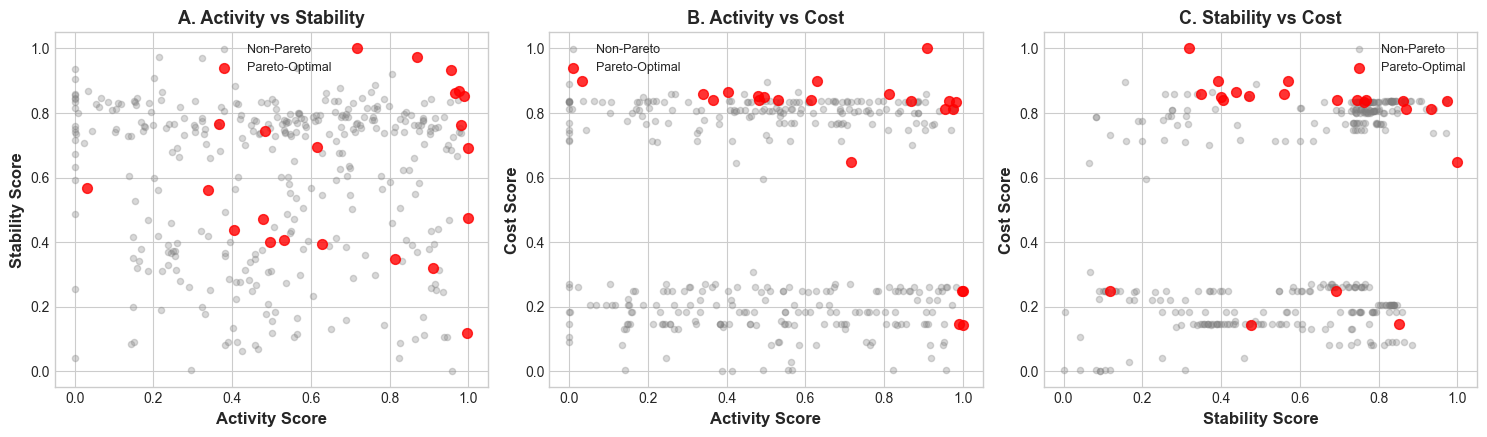


22 Pareto-optimal catalysts identified out of 361 total.


In [23]:
# Visualize Pareto front
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))

# All catalysts
all_cats = results_equal.copy()
pareto_mask = all_cats.index.isin(pareto_catalysts.index)

# Panel 1: Activity vs Stability
axes[0].scatter(all_cats[~pareto_mask]['activity_score'], 
                all_cats[~pareto_mask]['stability_score'],
                alpha=0.3, s=20, c='gray', label='Non-Pareto')
axes[0].scatter(all_cats[pareto_mask]['activity_score'], 
                all_cats[pareto_mask]['stability_score'],
                alpha=0.8, s=50, c='red', label='Pareto-Optimal')
axes[0].set_xlabel('Activity Score', fontsize=12)
axes[0].set_ylabel('Stability Score', fontsize=12)
axes[0].set_title('A. Activity vs Stability', fontsize=13, fontweight='bold')
axes[0].legend()

# Panel 2: Activity vs Cost
axes[1].scatter(all_cats[~pareto_mask]['activity_score'], 
                all_cats[~pareto_mask]['cost_score'],
                alpha=0.3, s=20, c='gray', label='Non-Pareto')
axes[1].scatter(all_cats[pareto_mask]['activity_score'], 
                all_cats[pareto_mask]['cost_score'],
                alpha=0.8, s=50, c='red', label='Pareto-Optimal')
axes[1].set_xlabel('Activity Score', fontsize=12)
axes[1].set_ylabel('Cost Score', fontsize=12)
axes[1].set_title('B. Activity vs Cost', fontsize=13, fontweight='bold')
axes[1].legend()

# Panel 3: Stability vs Cost
axes[2].scatter(all_cats[~pareto_mask]['stability_score'], 
                all_cats[~pareto_mask]['cost_score'],
                alpha=0.3, s=20, c='gray', label='Non-Pareto')
axes[2].scatter(all_cats[pareto_mask]['stability_score'], 
                all_cats[pareto_mask]['cost_score'],
                alpha=0.8, s=50, c='red', label='Pareto-Optimal')
axes[2].set_xlabel('Stability Score', fontsize=12)
axes[2].set_ylabel('Cost Score', fontsize=12)
axes[2].set_title('C. Stability vs Cost', fontsize=13, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\n{len(pareto_catalysts)} Pareto-optimal catalysts identified out of {len(all_cats)} total.")

## 5. Figure Generation


In [ ]:
# Generate figures using the Visualizer
viz = Visualizer(results_equal, calc.config)

# Create output directory
import os
output_dir = '../results/tutorial_HER_figures'
os.makedirs(output_dir, exist_ok=True)

# Generate all figures
viz.generate_publication_figures(output_dir)
print(f"\nFigures saved to: {output_dir}")

## 6. Comparison: How Weights Affect Rankings

In [ ]:
# Compare rankings across different weight configurations
comparison_data = []

# Get top 10 from each configuration
configs = [
    ('Equal', calc, results_equal),
    ('Activity-focused', calc_activity, results_activity),
    ('Cost-focused', calc_cost, results_cost)
]

print("Top 5 Catalysts Under Different Weight Schemes")
print("="*70)

for name, calculator, results in configs:
    top5 = results.nsmallest(5, 'rank')
    if 'symbol' in top5.columns:
        catalysts = top5['symbol'].tolist()
    else:
        catalysts = top5.index.tolist()
    print(f"\n{name}: {', '.join(str(c) for c in catalysts)}")

In [ ]:
# Visualize ranking changes
fig, ax = plt.subplots(figsize=(10, 6))

# Get top 20 from equal weights and track their rankings
top_20_equal = results_equal.nsmallest(20, 'rank').copy()

# Create comparison DataFrame
for idx in top_20_equal.index:
    equal_rank = results_equal.loc[idx, 'rank']
    activity_rank = results_activity.loc[idx, 'rank'] if idx in results_activity.index else np.nan
    cost_rank = results_cost.loc[idx, 'rank'] if idx in results_cost.index else np.nan
    
    ax.plot([0, 1, 2], [equal_rank, activity_rank, cost_rank], 
            'o-', alpha=0.5, linewidth=1.5)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Equal\n(0.33, 0.33, 0.34)', 
                    'Activity-focused\n(0.60, 0.20, 0.20)',
                    'Cost-focused\n(0.20, 0.20, 0.60)'])
ax.set_ylabel('Rank', fontsize=12)
ax.set_title('Ranking Changes for Top 20 Catalysts (Equal Weights)', fontsize=13, fontweight='bold')
ax.invert_yaxis()  # Lower rank = better
ax.set_ylim(100, 0)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Export Results

In [ ]:
# Export comprehensive results
results_dir = '../results/tutorial_HER_results'
os.makedirs(results_dir, exist_ok=True)

# Save full results
results_equal.to_csv(f'{results_dir}/HER_full_results.csv', index=False)

# Save top 50
top_50 = calc.get_top_catalysts(n=50)
top_50.to_csv(f'{results_dir}/HER_top50.csv', index=False)

# Save Pareto catalysts
pareto_catalysts.to_csv(f'{results_dir}/HER_pareto_optimal.csv', index=False)

print("Results exported:")
print(f"  - Full results: {results_dir}/HER_full_results.csv")
print(f"  - Top 50: {results_dir}/HER_top50.csv")
print(f"  - Pareto-optimal: {results_dir}/HER_pareto_optimal.csv")

## 8. Summary

In this tutorial, we completed a full HER catalyst screening workflow:

1. **Loaded and explored** the HER dataset (361 bimetallic surfaces)
2. **Calculated ASCI scores** with multiple weight configurations
3. **Identified Pareto-optimal** catalysts representing optimal trade-offs
4. **Generated figures** for visualization and analysis
5. **Compared rankings** under different optimization priorities
6. **Exported results** for further analysis

### Key Findings
- The top catalysts vary significantly based on weight selection
- Pareto-optimal catalysts provide robust candidates regardless of weights
- ASCI enables transparent, reproducible catalyst rankings

---

**Next:** Tutorial 3 - CO2RR Multi-Pathway Analysis